## My dearest Wesleykins,

Will you please integrate this? Mainly like that last cell at the bottom and there are a couple other changes. Everything in this first cell is gucci.... we may want to add "from tkinter import * " and "from tkinter import ttk" to this first box to keep it all in one place.

I think I'm going to change how we enter each of the x_inputs. Right now, we need to enter in all 4 inputs; no more and no less. So that's what I'll be working on and probably how to integrate the crosscompare function as well.



In [1]:
#import cv2
import numpy as np
import matplotlib
import scipy.io
import scipy.optimize
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import gridspec 
import pandas
#import magni
import math
from PIL import Image
#import seaborn as sns; sns.set()
from sklearn.cross_validation import train_test_split

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

def myround(x, base):
    return (float(base) * round(float(x)/float(base)))

params = {
    'lines.markersize' : 3,
    'axes.labelsize': 20,
    'font.size': 20,
    'legend.fontsize': 10,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'text.usetex': False,
    
   }


#plp.rcParams.update(params)
plt.rcParams.update(params)

C:\Users\Garrett\Miniconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [91]:
def selfCompare(x_input, y_input, n_trees=5, n_depth=5, n_feature_vector=1):
    """
    selfCompare

    selfCompare will train an random forrest on the top half of a set of input images 
    and use the bottom half to make a prediction of the photoluminescence of the same
    material. 

    selfCompare(n_trees, n_depth, n_feature_vector, x_input, y_input)

    n_trees: default 5

    n_depth: default 5

    n_feature_vector: default 1
        can be 1, 2, or 3 surrounding pixels

    x_input: no default, tuple of file names

    y_input: no default, file name
    """
    ###import modules
    import numpy as np
    
    
    ###User specified parameters
    inputs=np.zeros(len(x_input), dtype=object)
    Pl=np.loadtxt('../data/%s.txt' % y_input,skiprows=0, dtype=np.float64)

    x9x9 = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
    x7x7 = [-3, -2, -1, 0, 1, 2, 3]
    x5x5 = [-2, -1, 0, 1, 2]
    x3x3 = [-1, 0, 1]

    pixel_handles = [x3x3, x5x5, x7x7, x9x9]
    
    depths = n_depth
    trees = n_trees

    for h,i in enumerate(x_input):
        inputs[h] = np.loadtxt('../data/%s.txt' % i,skiprows=0, dtype=np.float64)

    ###Create training and testing arrays
    x = int(inputs[0].shape[0]/2)
    x2 = inputs[0].shape[0]
    y = inputs[0].shape[1]
    
 
    pixelContext = pixel_handles[n_feature_vector-1]
    Xtrain = np.zeros(((y-(max(pixelContext)*2))*(x-max(pixelContext)),(len(pixelContext)*len(pixelContext)\
                                    *len(inputs))))
    k=0

    for p in range(max(pixelContext),x):
        for q in range(max(pixelContext),y-max(pixelContext)):
            j=0
            for h, i in enumerate(inputs):
                
                for l in pixelContext:
                    for m in pixelContext:
                        Xtrain[k,j]=i[(p+l),(q+m)]
                        j=j+1
            k = k + 1

    Xtest = np.zeros(((y-(max(pixelContext)*2))*(x-max(pixelContext)),(len(pixelContext)*len(pixelContext)\
                                    *len(inputs))))
    k=0
    for p in range(x,x2-max(pixelContext)):
        for q in range(max(pixelContext),y-max(pixelContext)):
            j=0
            for h, i in enumerate(inputs):
                for l in pixelContext:
                    for m in pixelContext:
                        Xtest[k,j]=i[(p+l),(q+m)]
                        j=j+1
            k = k + 1

    Ytrain = np.zeros(((y-(max(pixelContext)*2))*(x-max(pixelContext))))
    k=0 
    for p in range(max(pixelContext),x):
        for q in range(max(pixelContext),y-max(pixelContext)):
            Ytrain[k]=Pl[p,q]
            k = k + 1

    Ytest = np.zeros(((y-(max(pixelContext)*2))*(x-max(pixelContext))))
    k=0
    for p in range(x,x2-max(pixelContext)):
        for q in range(max(pixelContext),y-max(pixelContext)):
            Ytest[k]=Pl[p,q]
            k = k + 1

    ###Run Algorithm
    k=0
    prediction = []

    clf = RandomForestRegressor(max_depth=depths, n_estimators=trees, bootstrap=True)
    clf.fit(Xtrain, Ytrain)
    hold = clf.predict(Xtest)
    score = metrics.mean_squared_error(Ytest, hold)
    roundscore = myround(score, 0.001)

    prediction.append(hold)
    k = k + 1

    k=0
    merge = (np.array(prediction).flatten())
    Pl_predict = np.zeros(((x-max(pixelContext))*1,(y-(max(pixelContext)*2))*1))
    for l in range(1):
        for i in range((x-max(pixelContext))*1):
            for j in range (y-(max(pixelContext)*2)):
                Pl_predict[i,j+(l*(y-(max(pixelContext)*2)))] = merge[k]
                k = k + 1
    
    fig = plt.figure(figsize=(10,10))
    
    pl_ax = fig.add_subplot(121)
    pl_ax.imshow(Pl_predict.T, cmap='viridis')
    pl_ax.text(-10,275,'%s x %s Feature Vector, %s depth, %s trees; score: %s' %(n_feature_vector,n_feature_vector,depths,\
        n_trees,roundscore), size=24)
    pl_ax.axes.get_xaxis().set_ticks([])
    pl_ax.axes.get_yaxis().set_ticks([])
    pl_ax.set_title('Prediction', size=30)
   
    pl_ax2 = fig.add_subplot(122)
    pl_ax2.set_title('Actual', size=30)
    pl_ax2.imshow(Pl[Pl.shape[0]/2:,:].T, cmap='viridis')
    pl_ax2.axes.get_xaxis().set_ticks([])
    pl_ax2.axes.get_yaxis().set_ticks([])
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None,\
                        wspace=None, hspace=None)
    #return clf
    return(clf)
    plt.show()
    #fig.savefig(filename='vector_variation_MABr', bbox_inches='tight')

C:\Users\Garrett\Miniconda3\lib\site-packages\ipykernel\__main__.py:123: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

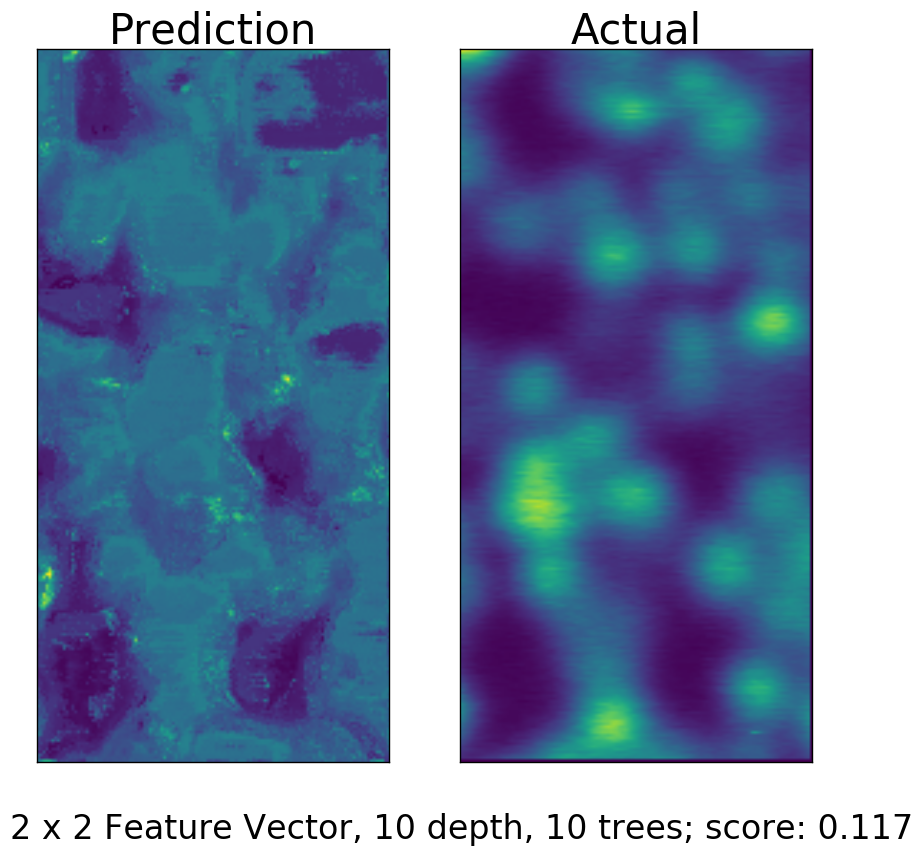

In [92]:
selfCompare(['MABr.1.Ht', 'MABr.1.Po', 'MABr.1.Ph', 'MABr.1.Am'], 'MABr.1.Pl',\
         n_feature_vector=2, n_trees=10, n_depth=10)

C:\Users\Garrett\Miniconda3\lib\site-packages\ipykernel\__main__.py:123: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


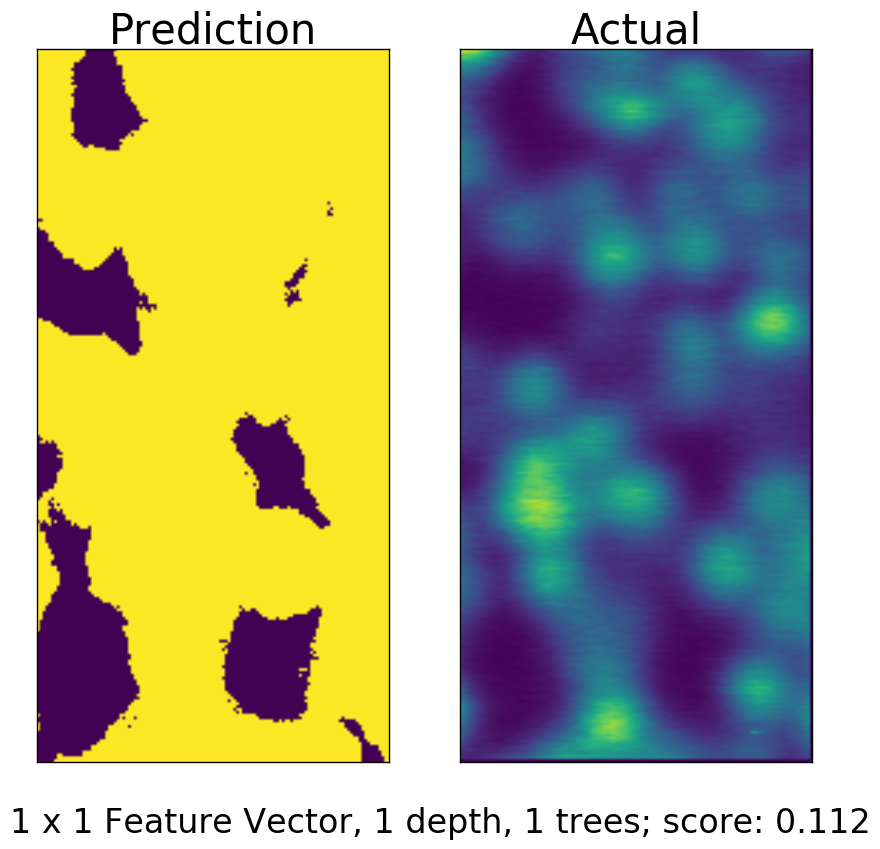

In [93]:
from tkinter import *
from tkinter import ttk
    
def calculate(**kwargs):
    """
    Calculate

    Calculate defines the calculate button on the GUI so that it runs the selfCompare function with the inputted parameters.

    Calculate(**kwargs)

    Takes any arguments. Mainly it takes the x_inputs, y_input, n_trees, n_depth, and n_feature_vector to input into 
    the selfCompare function. 
    """
    x=[xvector1.get(),xvector2.get(),xvector3.get(),xvector4.get()]
    selfCompare(x_input=x, y_input=yvector.get(), n_trees=trees.get(), n_depth=depths.get(),n_feature_vector=feature_vector.get())

    root.destroy()

root = Tk()
root.title("AFM Random Forest Tree Regressor")

mainframe = ttk.Frame(root, padding="3 3 12 12")
mainframe.grid(column=0, row=0, sticky=(N, W, E, S))
mainframe.columnconfigure(0, weight=1)
mainframe.rowconfigure(0, weight=1)

trees = IntVar()
depths = IntVar()
feature_vector = IntVar()
xvector1 = StringVar()
xvector2 = StringVar()
xvector3 = StringVar()
xvector4 = StringVar()

yvector = StringVar()

xinput1 = ttk.Entry(root, textvariable=xvector1).grid(column=2,row=4)
xinput2 = ttk.Entry(root, textvariable=xvector2).grid(column=2,row=5)
xinput3 = ttk.Entry(root, textvariable=xvector3).grid(column=2,row=6)
xinput4 = ttk.Entry(root, textvariable=xvector4).grid(column=2,row=7)
ttk.Label(root, text="--------------------------").grid(column=2,row=8)

yinput = ttk.Entry(root, textvariable=yvector).grid(column=2,row=9)
ttk.Label(root, text="X inputs into regressor: ").grid(column=1,row=4)
ttk.Label(root, text="Y inputs into regressor: ").grid(column=1,row=9)


trees_entry = Spinbox(root, from_=1.0, to=20.0, textvariable=trees)
depths_entry= Spinbox(root, from_=1.0, to=20.0, textvariable=depths)
features_entry= Spinbox(root, from_=1.0, to=3.0, textvariable=feature_vector)

depths_entry.grid(column=2, row=1, sticky=W)
trees_entry.grid(column=2, row=2, sticky=W)
features_entry.grid(column=3,row=2)

ttk.Button(root, text="Calculate", command=calculate).grid(column=2, row=10, sticky=W)
           
ttk.Label(root, text="Depth of Trees: ").grid(column=1, row=1, sticky=E)
ttk.Label(root, text="Number of Trees: ").grid(column=1, row=2, sticky=E)
ttk.Label(root, text="Size of Feature Vector:").grid(column=3, row=1, sticky=(W,E))

for child in root.winfo_children(): child.grid_configure(padx=5, pady=5)

depths_entry.focus()

root.mainloop()